<a href="https://colab.research.google.com/github/Ahbin-Park/abinushka/blob/Python/Codeit_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4_Topic3_Visualization(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter1. 시각화와 그래프**



*   선 그래프
*   막대 그래프
*   파이 그래프
*   히스토그램
*  박스 플롯
* 산점도



## 1. 선그래프

In [ ]:
%matplotlib inline

import pandas as pd
df = pd.read_csv('broadcast.csv', index_col=0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


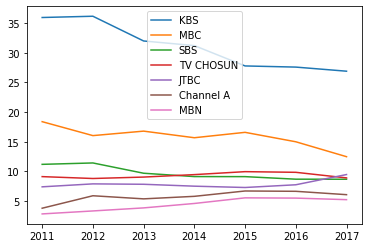

In [ ]:
df.plot(kind='line') #kind='line'은 생략 가능(선 그래프가 기본)

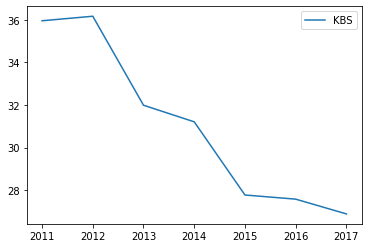

In [ ]:
df.plot(y='KBS')

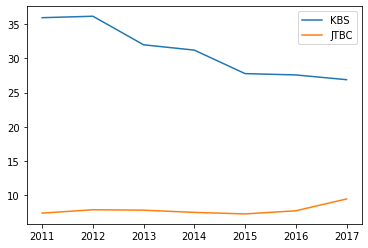

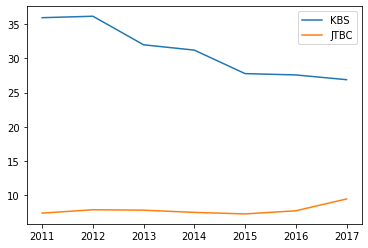

In [ ]:
#plot함수 사용
df.plot(y=['KBS','JTBC'])
df[['KBS','JTBC']].plot()

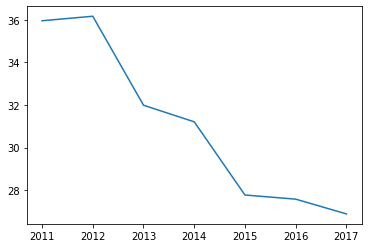

In [ ]:
df['KBS'].plot()

## 2. 막대그래프

In [ ]:
df_sports = pd.read_csv('sports.csv', index_col = 0)
df_sports 

,Male,Female
Swimming,103,178
Baseball,363,289
Basketball,151,97
Golf,154,232
Soccer,413,109
Bowling,88,129


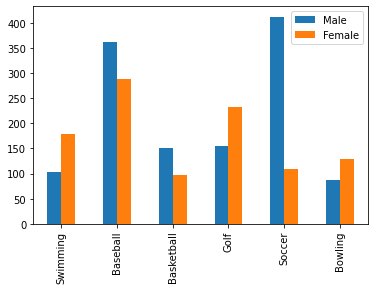

In [ ]:
df_sports.plot(kind='bar')

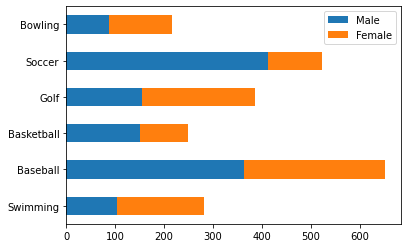

In [ ]:
df_sports.plot(kind='barh', stacked=True) #가로로, 쌓아 올려서(stack) 표현

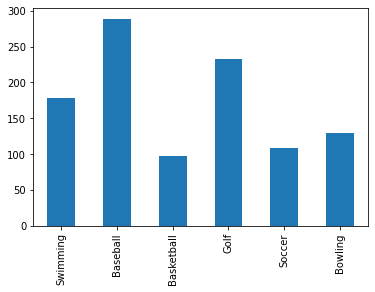

In [ ]:
#여성 column만 대상으로
df_sports['Female'].plot(kind='bar')

### 연습문제

In [ ]:
df = pd.read_csv('data/silicon_valley_summary.csv')
df
boolean = (df['gender'] == 'Male') & (df['job_category'] == 'Managers') & (df['race_ethnicity'] != 'All')
df_new = df.loc[boolean , :]
df_new.plot(kind='bar', x='race_ethnicity', y='count'

In [ ]:
#각 조건들을 명확하게 표기하고, 간단하게 쓰는 법
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/silicon_valley_summary.csv')
boolean_male = df['gender']=='Male'
boolean_manager = df['job_category'] == 'Managers'
boolean_not_all = df['race_ethnicity'] != 'All'

df[boolean_male & boolean_manager & boolean_not_all].plot(kind='bar', x='race_ethnicity',  y='count')

## 3. 파이 그래프

In [ ]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('broadcast.csv', index_col = 0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


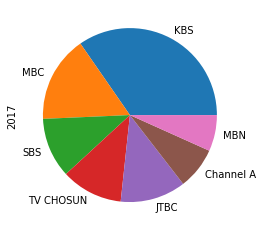

In [ ]:
df.loc[2017].plot(kind='pie')

### 연습문제

In [ ]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/silicon_valley_details.csv')
a = df['count'] != 0
b = (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')
c = df['company'] == 'Adobe'
d = df['race'] == 'Overall_totals'
#df[boolean_a & boolean_b].plot(kind = 'pie', y='job_category', y='count')
df[a & b & c & d].set_index('job_category').plot(kind='pie', y ='count')

In [ ]:
%matplotlib inline
import pandas as pd

df = pd.read_csv("data/silicon_valley_details.csv")

boolean_adobe = df['company'] == 'Adobe'
boolean_all_races = df['race'] == 'Overall_totals'
boolean_count = df['count'] != 0
boolean_job_category = (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')

df_adobe = df[boolean_adobe & boolean_all_races & boolean_count & boolean_job_category]
df_adobe.set_index('job_category', inplace=True)
df_adobe.plot(kind='pie', y= 'count')

## 4. 히스토그램

* 분포를 범위별로 파악

In [ ]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('body.csv', index_col = 0)
df.head(10)

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0
6,175.4,72.7
7,181.5,87.9
8,174.2,64.5
9,176.4,57.5


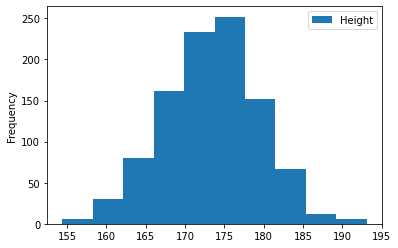

In [ ]:
df.plot(kind='hist', y='Height') 

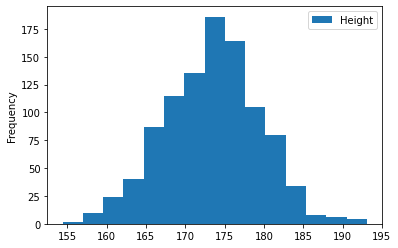

In [ ]:
df.plot(kind='hist', y='Height', bins=15)  #범위 설정(bins)

## 5. 박스 플롯



> 데이터셋 크기, 데이터 분포/분산 정도를 파악, 비교할 수 있음



*  최댓값, Q3 (75%), 중간값 (50%), Q1(25%), 최솟값
*  최대, 최소 -> 수염 (위스커)
*  25%~75% -> 박스
*  최소, 최대 바깥 -> 이상점 (outliers)

In [ ]:
df = pd.read_csv('exam.csv', index_col = 0)
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75


In [ ]:
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

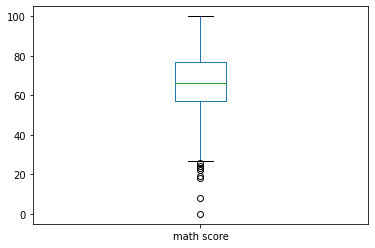

In [ ]:
df.plot(kind='box',y='math score')
#혹은 df['math score'].plot(kind='box')

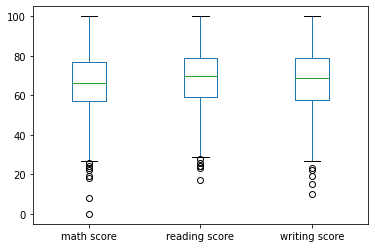

In [ ]:
df.plot(kind='box',y=['math score', 'reading score', 'writing score'])

## 6. 산점도

- 연관성의 파악 (상관관계 파악)

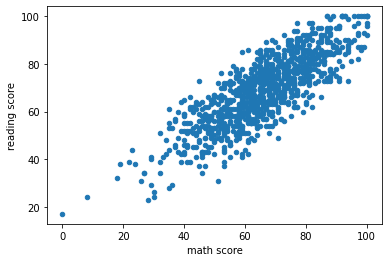

In [ ]:
df.plot(kind='scatter', x='math score', y='reading score')

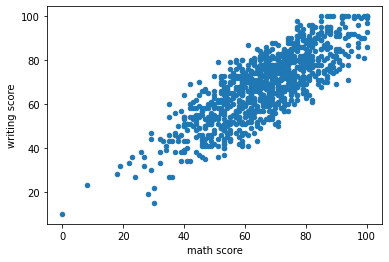

In [ ]:
df.plot(kind='scatter', x='math score', y='writing score')

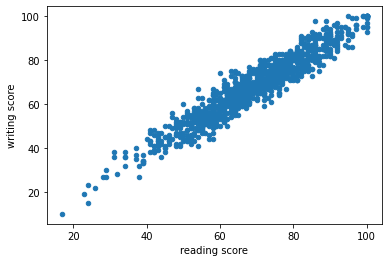

In [ ]:
df.plot(kind='scatter', x='reading score', y='writing score') #특히 더 연관성이 강한 것이 보임

### 실습과제 (국가 지표 분석): 가장 연관성 높은 관계를 골라라

In [ ]:
df = pd.read_csv('world_indexes.csv', index_col = 0)
df.head()

,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Norway,0.943877,26.83,7.834,100.0,0.778925,9.192879,11.914567,5.22,104.194175,86.956222,1.51,11.3,100.0,17.49259,67.03594,5.2,0.512555,27.973433,57.271805,0.750000,0.067443,1.815164,21.852720,317.497587,62448.01762,22.644476,64992.34046,0.00000,2.2,2.3,4963.0,-3.37449,96.30,26.800000,81.6,13.0,4.0,12.631000,116.51,9.019499,6.0,37.39,12.347838,0.186818,97.05961,98.85057,99.43699,1.511550,72.0,11.467400,6.55284,9.573011,9.590637,0.013,0.154407,47.752676,1.65474,111.06130,39.644970,13.772622,31.798391,74.10112,27.288097,0.14,2.8
Australia,0.934958,34.01,12.059,100.0,1.090351,16.519210,-4.561812,30.27,107.789440,158.840776,1.36,6.3,100.0,20.22107,40.99572,5.2,3.330412,19.193731,95.367798,3.930000,0.110130,-0.017410,17.746742,990.721004,42831.06163,28.327407,42260.61295,33.40662,1.1,3.4,6382.0,17.13209,84.56,39.900000,82.4,16.1,6.0,12.963381,131.23,3.819851,6.5,32.73,1337.393551,8.984550,94.44895,107.77737,104.83840,6.118623,130.0,-6.789013,5.11041,8.998704,12.303007,0.025,0.157953,4.632202,2.38562,135.53543,30.530973,27.711793,65.333748,86.33409,21.361426,0.19,4.0
Switzerland,0.929613,32.35,1.900,100.0,-1.101254,4.625230,8.567416

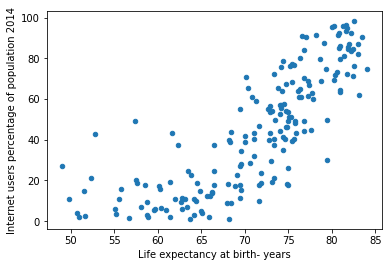

In [ ]:
df.plot(kind='scatter', x='Life expectancy at birth- years', y='Internet users percentage of population 2014')

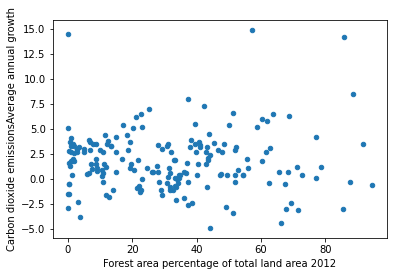

In [ ]:
df.plot(kind='scatter', x='Forest area percentage of total land area 2012', y='Carbon dioxide emissionsAverage annual growth')

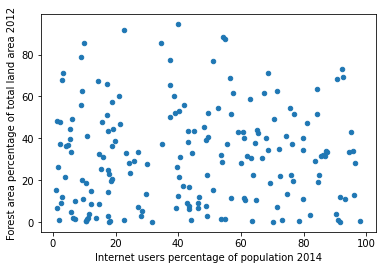

In [ ]:
df.plot(kind='scatter', x='Internet users percentage of population 2014', y='Forest area percentage of total land area 2012')

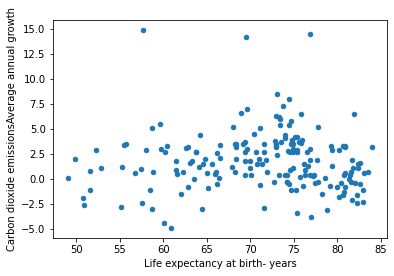

In [ ]:
df.plot(kind='scatter', x='Life expectancy at birth- years', y='Carbon dioxide emissionsAverage annual growth')

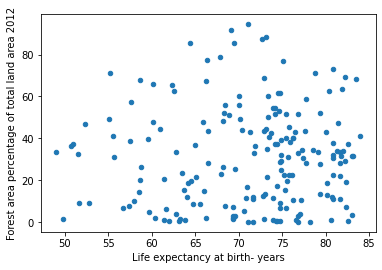

In [ ]:
df.plot(kind='scatter', x='Life expectancy at birth- years', y='Forest area percentage of total land area 2012')

# **Chapter2. Seaborn 시각화**

## 1. Seaborn(Statistical Data Visualization)
https://seaborn.pydata.org/examples

### 확률밀도함수 (Probability Density Function)

## 2. KDE (Kernel Density Estimation)

In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 3.9 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
body_df = pd.read_csv('body.csv', index_col = 0)
body_df.head()

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0


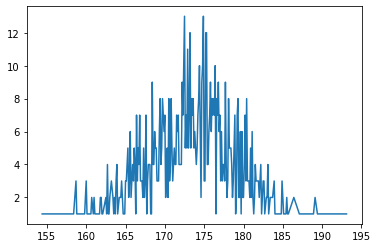

In [ ]:
body_df['Height'].value_counts().sort_index().plot() #보기 힘들다

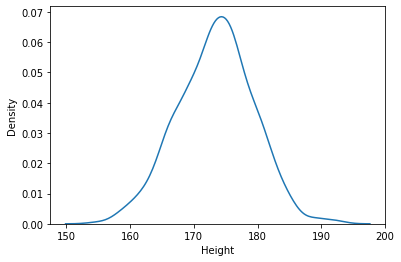

In [ ]:
sns.kdeplot(body_df['Height']) #확률밀도함수 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


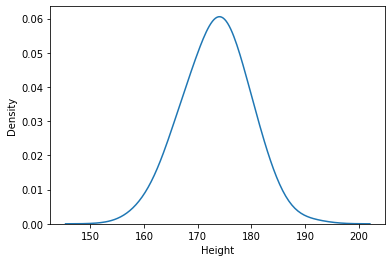

In [ ]:
sns.kdeplot(body_df['Height'], bw=0.5) #밀도 조정

### KDE 활용예시

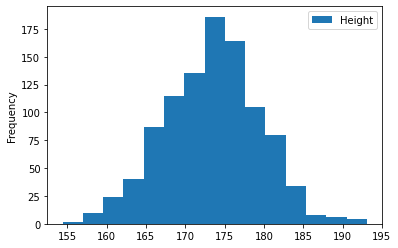

In [ ]:
body_df.plot(kind='hist', y='Height', bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


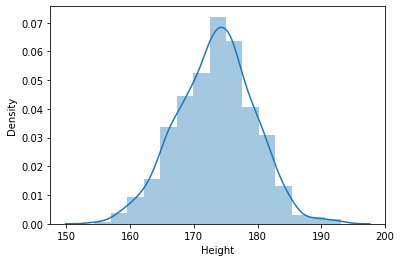

In [ ]:
sns.distplot(body_df['Height'], bins=15)

**박스플롯, 바이올린플롯 비교**

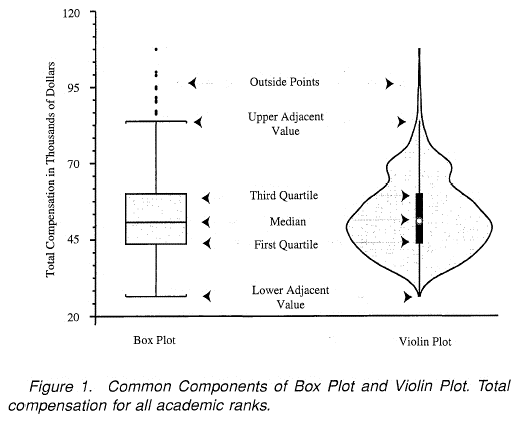

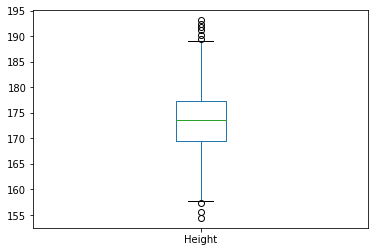

In [ ]:
#박스플롯
body_df.plot(kind='box', y='Height')

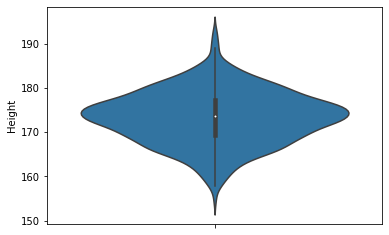

In [ ]:
#바이올린 플롯 (모든 분포를 보여줌, boxplot과 kdeplot을 동시에 나타냄)
sns.violinplot(y = body_df['Height'])

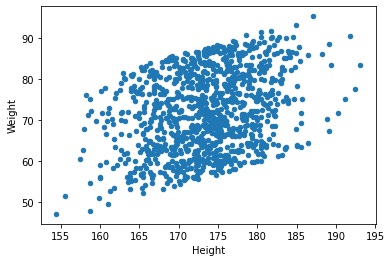

In [ ]:
#산점도
body_df.plot(kind='scatter', x='Height', y='Weight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


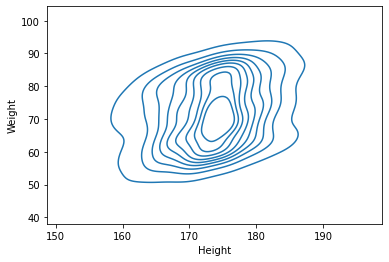

In [ ]:
sns.kdeplot(body_df['Height'], body_df['Weight']) #간격이 좁을수록 가파름 (분포 파악 가능)

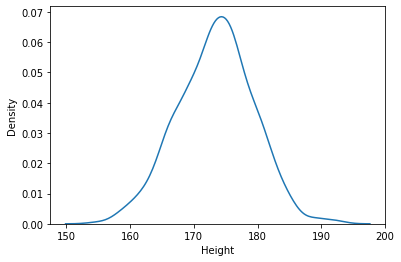

In [ ]:
sns.kdeplot(body_df['Height'])

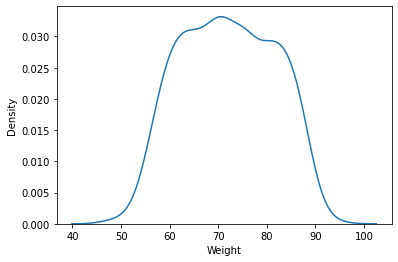

In [ ]:
sns.kdeplot(body_df['Weight'])

### LM Plot

In [ ]:
import pandas as pd
import seaborn as sns

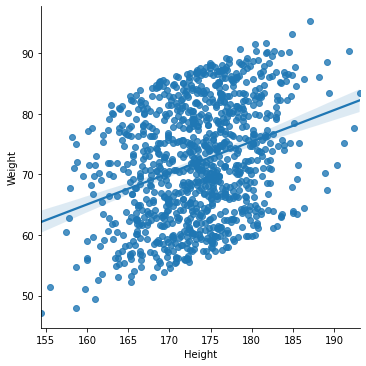

In [ ]:
sns.lmplot(data=body_df, x='Height', y='Weight') #선은 회귀선을 의미

In [ ]:
#카테고리별 시각화

laptops_df = pd.read_csv('laptops.csv')
laptops_df['os'].unique()

array(['linux', 'mac', 'windows'], dtype=object)

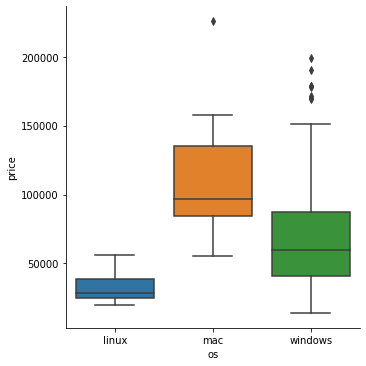

In [ ]:
sns.catplot(data=laptops_df, x='os', y='price', kind='box')

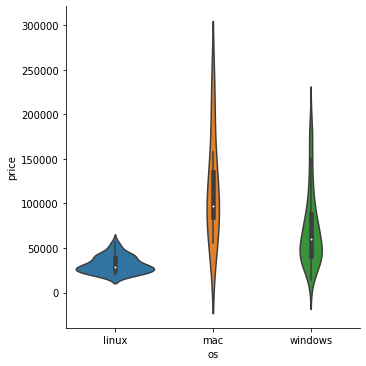

In [ ]:
sns.catplot(data=laptops_df, x='os', y='price', kind='violin')

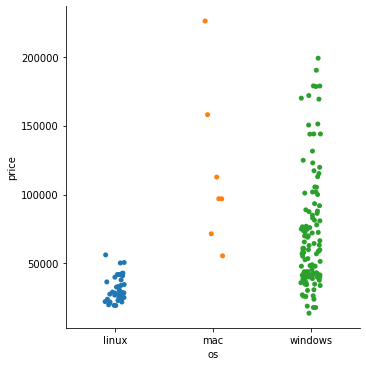

In [ ]:
sns.catplot(data=laptops_df, x='os', y='price', kind='strip')

In [ ]:
laptops_df['processor_brand'].unique()

array(['intel', 'amd'], dtype=object)

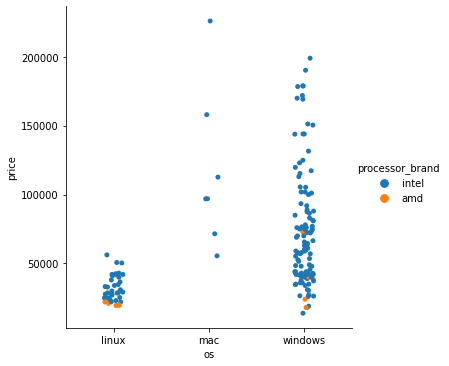

In [ ]:
#processor 별로 나누어보고 싶다면 (추가 분류)
sns.catplot(data=laptops_df, x='os', y='price', kind='strip', hue = 'processor_brand')

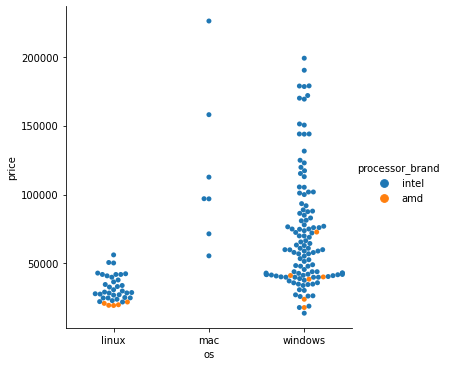

In [ ]:
sns.catplot(data=laptops_df, x='os', y='price', kind='swarm', hue = 'processor_brand') #점들이 몰려있을 때 잘 안보이는 문제점 해결

seaborn 관련 참고글
https://pinkwink.kr/984

## 3. 통계 기본 상식 (평균, 중간값, 상관 계수 등)

### 평균값(Mean)

In [ ]:
a = [10.3, 9.7, 10.3, 9.5, 10.1, 10.8, 9.5, 9.4, 10.1, 10.3]
import numpy as np
np.mean(a)

9.999999999999998

In [ ]:
ab=[70000, 54000, 97000, 83000, 66000, 80000]
a=np.sum(ab)
print(a)
b = 77000*7
print(b)
c = b-a
print(c)

450000
539000
89000


### 중간값(Median)

> 평균 - 잘못되거나 큰 데이터에 의해 영향을 받음

> 중앙값 - 가운데 있는 수자로 영향을 받지 않음, 단 중간값은 같으나 평균의 차이가 큰 경우가 있을 수 있음

In [ ]:
np.median([44, 42, 43, 28, 46, 33, 42, 37, 29])

42.0

In [ ]:
np.median([
33,	45,	98,	38,	21,	49,	51,	58,	82,	75,
])

50.0

### **상관계수: 피어슨상관계수 Pearson Correlation Coefficient**


*   피어슨상관계수 = 0 : 상관관계 없음

*   피어슨상관계수 = 1 : 강한 양의 상관관계
*   피어슨상관계수 = -1 : 강한 음의 상관관계

In [ ]:
#히트맵 사용하기
%matplotlib inline
import pandas as pd

df = pd.read_csv('exam.csv')

df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


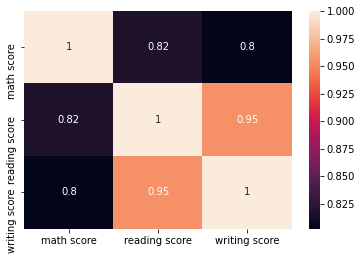

In [ ]:
sns.heatmap(df.corr(), annot=True) #색이 밝을수록 상관 계수가 더 높다는 의미, annot=True 옵션을 추가해주면, 색상 뿐 아니라 숫자도 함께 보여줌